In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("Position_salaries.csv")

In [4]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
df.shape

(10, 3)

In [6]:
X = df.iloc[:, 1:2].values
Y = df.iloc[:, 2].values

In [7]:
print("The shape of X: {}".format(X.shape))
print("The shape of Y: {}".format(Y.shape))

The shape of X: (10, 1)
The shape of Y: (10,)


Feature Selection</p>
No Train test split becaues we do not have enough data

In [8]:
#Building our Linear Regression Model
regressor = RandomForestRegressor(n_estimators = 12, random_state = 0)
regressor.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
# Predicting a new result
y_pred = regressor.predict(X)

In [10]:
# The mean squared error
print("The Mean Squared Error is: %.2f" % mean_squared_error(Y, y_pred))
# Explained variance score: 1 is perfect prediction
print("Variance Score: %.2f" % r2_score(Y, y_pred))
#Accuracy
acc = (r2_score(Y, y_pred)*100).astype('int32')
print("Accuracy is: {}%".format(acc))

The Mean Squared Error is: 2975347222.22
Variance Score: 0.96
Accuracy is: 96%


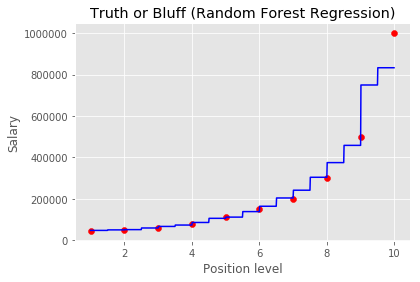

In [13]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()